In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
from dataloader import DataLoader
from PIL import Image
from _graphutils import GraphUtils
from _plotutils import PlotUtils
from kernels.wlkernel import WLKernel
from kernels.shortestpathkernel import ShortestPathKernel
from kernels.randomwalkkernel import RandomWalkKernel
from kernels.labelhasher import LabelHasher

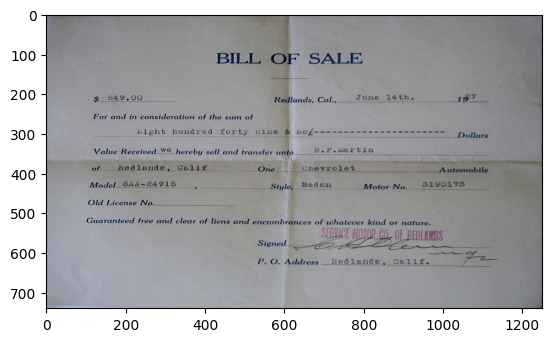

In [7]:
dl = DataLoader("../eyelink_data")

imgs = dl.get_most_used_images()

 # 6, 7, 11, 12, 13, 18
img = imgs[13]
img_file = dl.get_image(imgs[2])

plt.imshow(img_file)

In [ ]:
all_trials = dl.get_image_trials(img)
trial = all_trials[11]

PlotUtils.trace_plot(trial, "subject 11", image=img_file)

In [ ]:
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

trial_clustered, _, k = GraphUtils.optimal_clustering(MIN_CLUSTERS, MAX_CLUSTERS, trial)
PlotUtils.clustering_plot(trial_clustered, title=f"Subject 11", image=img_file)

In [ ]:
tm = GraphUtils.transition_matrix(trial_clustered,)
PlotUtils.heatmap(tm)

In [ ]:
G = GraphUtils.transition_matrix_to_graph(tm)
PlotUtils.draw(G, weights=True)

In [ ]:
wl = WLKernel(hasher=LabelHasher())
wl.get_feature_vector(G, refinement_steps=5)